<a href="https://colab.research.google.com/github/aiAintEasy-HolyCalamity/DigitRecognitionMNIST_VisualizePredictions/blob/main/DigitRecognitionMNIST_VisualizePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [1]:
!pip install tensorflow matplotlib numpy

In [3]:
#Load and preprocess the data
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data​
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training samples:", X_train.shape)

#Pixel values range from 0 to 255. This will give you a number between 0 and 1​.
#Normalizing speeds up training and improves accuracy.

Training samples: (60000, 28, 28)


In [10]:
#Build Neural Network Model
from tensorflow.keras.models import Sequential
#Build Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax') #10
#classes for digits 0-9
])
#Flatten: Converts 28x28 images into a 1D array.​
#Dense Layers: Neurons connected to every neuron in the next layer.​
#ReLU Activation: Adds non-linearity.​
#Softmax: Produces probability scores for each digit (0-9).​
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax') #10
#classes for digits 0-9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Compile and train
model.compile(optimizer='adam',

	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8783 - loss: 0.4349 - val_accuracy: 0.9667 - val_loss: 0.1223
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9635 - loss: 0.1255 - val_accuracy: 0.9745 - val_loss: 0.0881
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.0821 - val_accuracy: 0.9750 - val_loss: 0.0807
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9811 - loss: 0.0596 - val_accuracy: 0.9718 - val_loss: 0.0982
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9862 - loss: 0.0459 - val_accuracy: 0.9813 - val_loss: 0.0704


#Adam Optimizer Combines the best of Momentum and RMSprop optimizers.​
Faster and more efficient convergence.

In [12]:
#Evaluate model on test data

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0817
Test Accuracy: 0.9767000079154968


In [13]:
model.save('mnist_digit_classifier.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


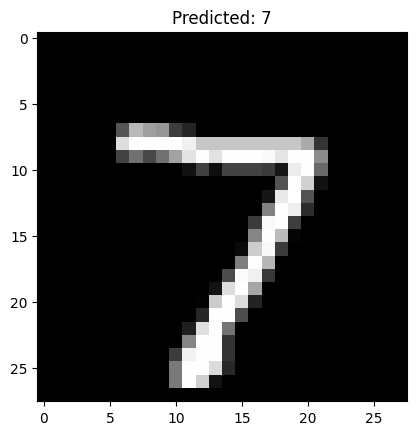

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


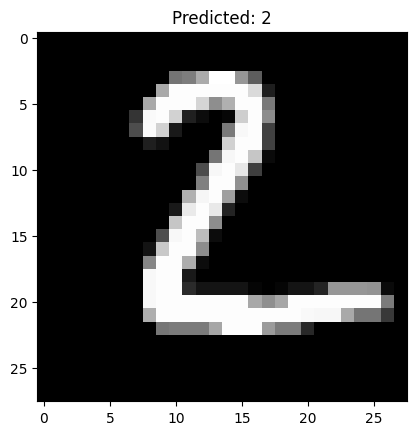

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


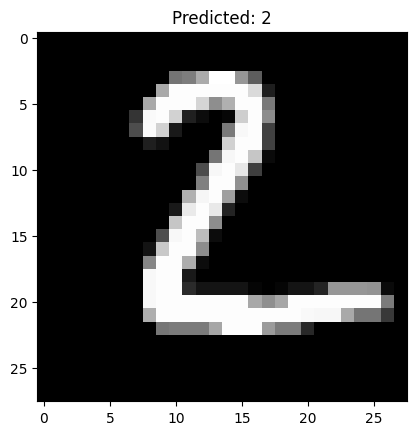

In [17]:
#Build web app to make predictions
#Visualize predictions

#Build web app to make predictions
#Visualize predictions

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[1], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[1])}")
plt.show()

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[1], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[1])}")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


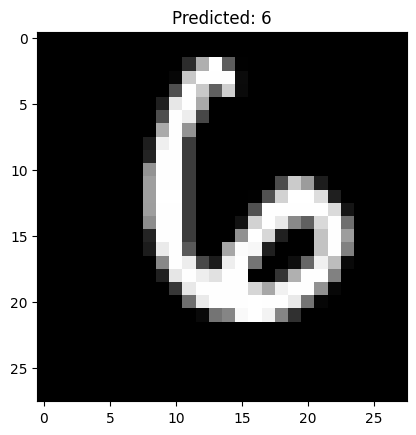

In [21]:
import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[88], cmap= 'gray')
plt.title(f"Predicted: {np.argmax(predictions[88])}")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


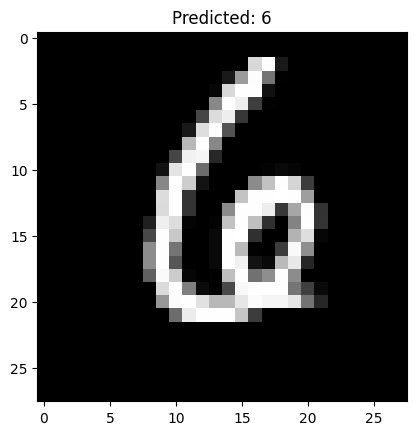

In [23]:
import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[123], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[123])}")
plt.show()

In [25]:
#CNNs work better with image data by capturing spatial patterns.​
#CNNs work better with image data by capturing spatial patterns.​
#Helps improve accuracy beyond basic dense layers.​

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Reshape data for CNN​
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
cnn_model = Sequential([
	Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
	MaxPooling2D((2, 2)),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D((2, 2)),
	Flatten(),
	Dense(64, activation='relu'),
	Dropout(0.5),
	Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8085 - loss: 0.5945 - val_accuracy: 0.9812 - val_loss: 0.0610
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9601 - loss: 0.1357 - val_accuracy: 0.9857 - val_loss: 0.0469
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9707 - loss: 0.0985 - val_accuracy: 0.9890 - val_loss: 0.0356
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9753 - loss: 0.0806 - val_accuracy: 0.9903 - val_loss: 0.0301
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9776 - loss: 0.0750 - val_accuracy: 0.9905 - val_loss: 0.0339
